# Preamble 

In [35]:
wld_dir = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD'
wld_pkg = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/WeakLensingDeblending'

import os
os.chdir(wld_dir)

%matplotlib inline

import mycode.tomo.tomo_fncs as tomo_fncs
import mycode.errors as errors
import mycode.preamble as preamble
import mycode.weights as weights 
import mycode.maps as maps 
import corner 
from tqdm import tqdm 

%run mycode/preamble.py

In [36]:
from importlib import reload
reload(errors)
reload(weights)
reload(preamble)
reload(maps)
reload(corner)

<module 'corner' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/miniconda3/envs/igalsim/lib/python3.7/site-packages/corner/__init__.py'>

# Read catalogues 


In [16]:
#filters to apply as reading the catalogue. 
prefilters = [
    maps.get_non_duplicated_cat
]

ffilters = [maps.good, maps.best]

In [29]:
#default step size
cat_name1 = "final_fitsLSST7"
main_catsLSST = maps.retrieve_cats("final_fitsLSST", only_zero_shear=True)
pfmain_catsLSST = maps.get_filter_cats(main_catsLSST, prefilters)
cat1 = pfmain_catsLSST[0]

scat1 = maps.get_filter_cats(pfmain_catsLSST, ffilters)[0]

retrieving zero shear cat from default step size catalogue...


# Construct triangle plot using corner 

In [31]:
def keep_quantiles(dbt, p=0.005, p2=None): 
    q1 = np.quantile(dbt, p)
    if p2 is None: 
        q2 = np.quantile(dbt, 1-p)
    else: 
        q2 = np.quantile(dbt, p2)
    return weights.cut_both(dbt, q1, q2)
    

In [32]:
# get biases in the corner.py format (blending off and on)
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']
params_grp = [param+'_grp' for param in params]

biases = np.array([list(scat1[param]) for param in params]).T
biases_grp = np.array([list(keep_quantiles(scat1[param])) for param in params_grp]).T #.99 kept. 
#biases_grp

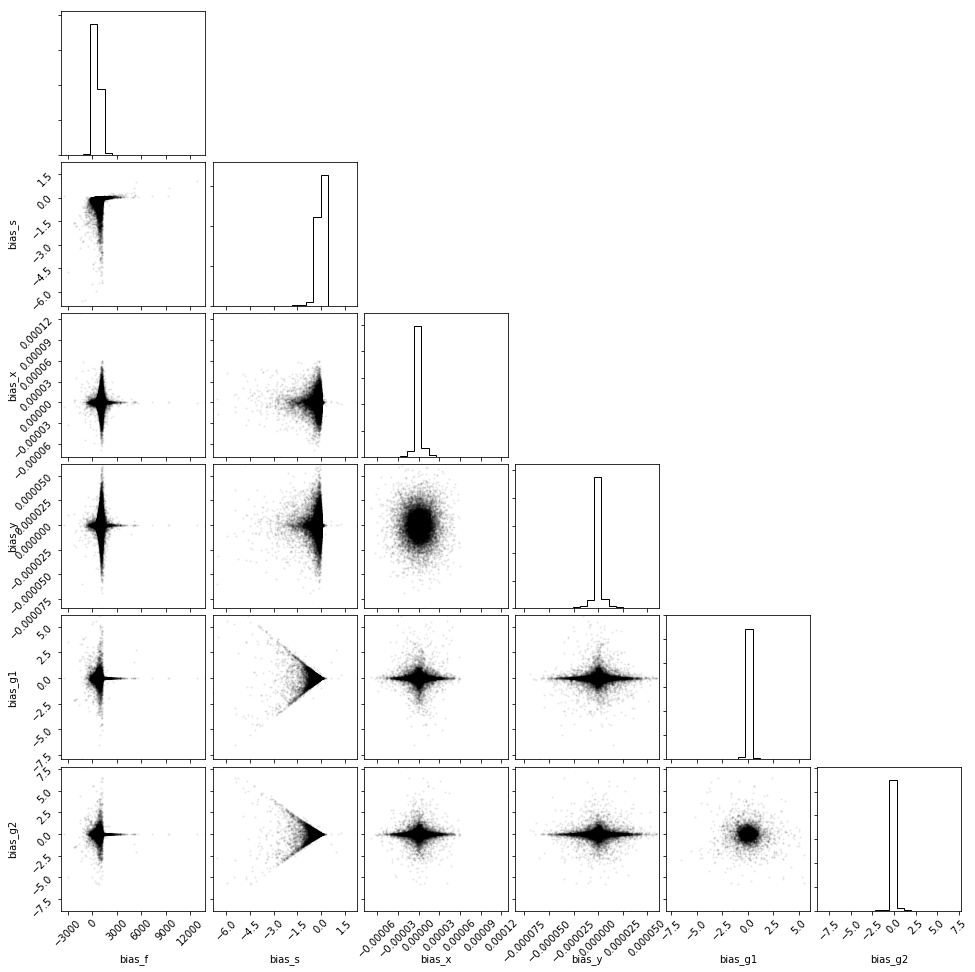

In [37]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, #'markevery':4
                                                                                    }}
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);

(-6, 1.5)

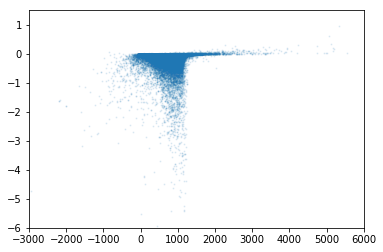

In [11]:
plt.figure()
plt.scatter( scat1['bias_f'], scat1['bias_s'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-6, 1.5)

(-6, 1.5)

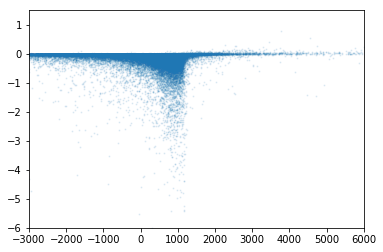

In [13]:
plt.figure()
plt.scatter( scat1['bias_f_grp'], scat1['bias_s_grp'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-6, 1.5)

(-6e-06, 6e-06)

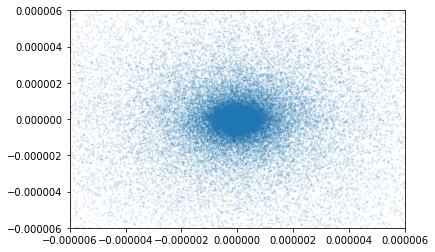

In [12]:
plt.figure()
plt.scatter( scat1['bias_x'], scat1['bias_y'], alpha = 0.1, s=1)
plt.xlim(-6e-6, 6e-6)
plt.ylim(-6e-6, 6e-6)



(-5, 5)

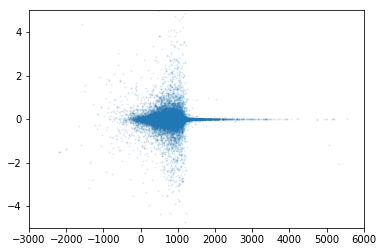

In [7]:
plt.figure()
plt.scatter( scat1['bias_f'], scat1['bias_g2'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-5, 5)

(-5, 5)

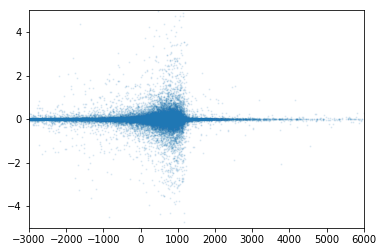

In [14]:
plt.figure()
plt.scatter( scat1['bias_f_grp'], scat1['bias_g2_grp'], alpha = 0.1, s=1)
plt.xlim(-3000, 6000)
plt.ylim(-5, 5)

In [10]:
np.min(scat1['flux'])

29257.875

(-2, 2)

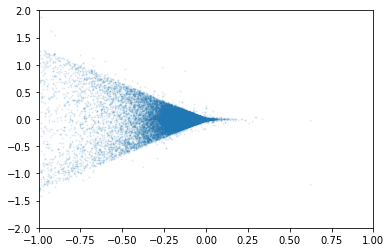

In [6]:
plt.figure()
plt.scatter( scat1['bias_s'], scat1['bias_g2'], alpha = 0.1, s=1)
plt.xlim(-1, 1)
plt.ylim(-2, 2)

# plt.figure()
# plt.scatter(scat1['bias_x'], scat1['bias_y'])
# plt.xlim(-1e-4, 1e-4)
# plt.ylim(-1e-4, 1e-4)



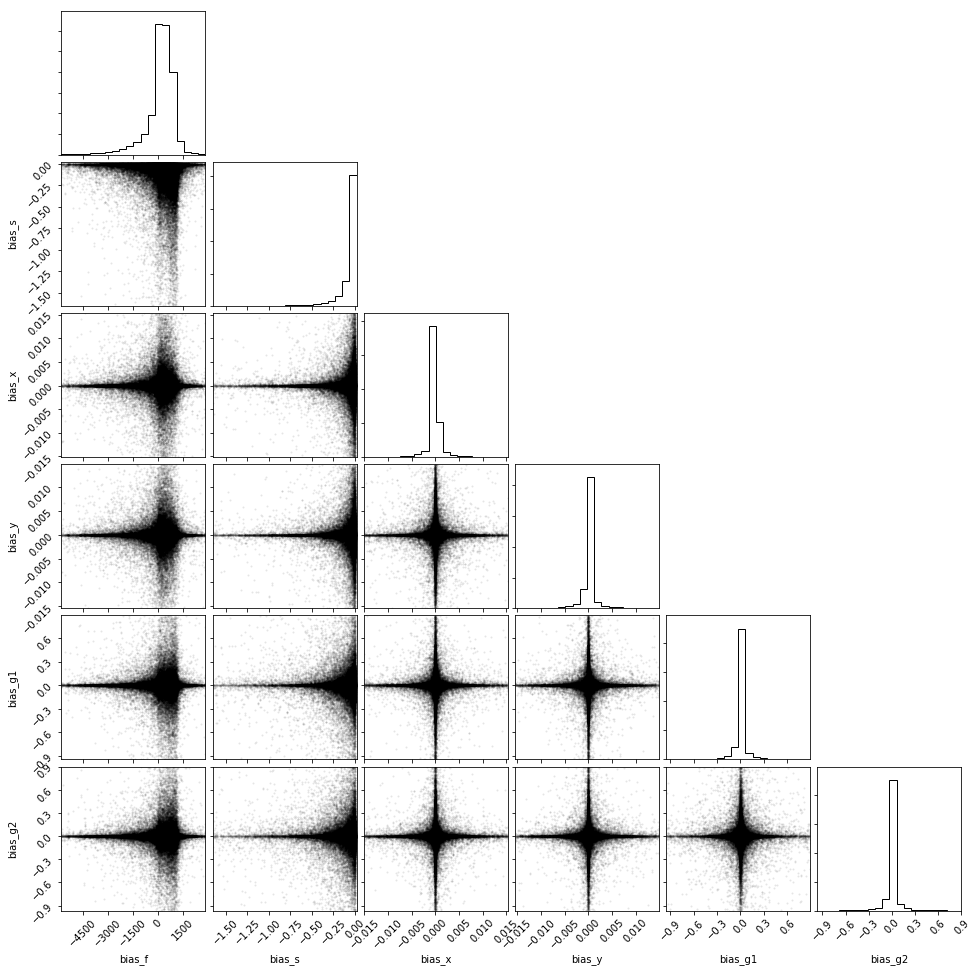

In [25]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quite':False, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.1, #'markevery':4
                                                                                    }}
figure = corner.corner(biases_grp, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);


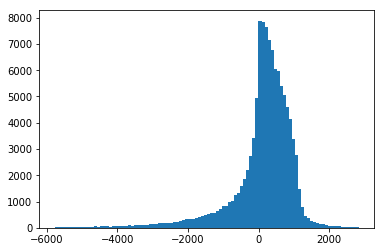

In [88]:
plt.hist(keep_quantiles(scat1['bias_f_grp']), bins=100);

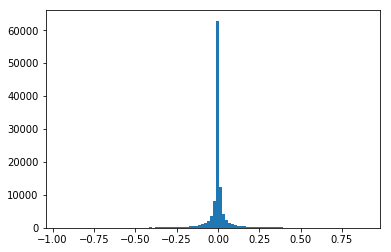

In [89]:
plt.hist(keep_quantiles(scat1['bias_g1_grp']),bins=100 );

In [83]:
np.quantile(scat1['bias_x_grp'],0.001)
min(scat1['bias_x_grp'])

-69461.67